
## Assignment 1

**Submission deadlines:** 
- get at least **2** points by Tuesday, 11.03.2025
- remaining points: last lab session before or on Tuesday, 18.03.2025

**Points:** Aim to get 8 out of 14 possible points

## Submission instructions
The class is held on-site in lab rooms. Please prepare you notebook on your computer or anywhere in the cloud (try using DeepNote or Google Colab).

Make sure you know all the questions and answers, and that the notebook contains results; before presentation do `Runtime -> Restart and run all`
![Picture title](image-20220302-183151.png)

We provide starter code, however you are not required to use it as long as you properly solve the tasks.


# Task description

## TLDR
Implement and train a neural network using pure `torch`.


## Problem 1 [2p]
Implement a two-layer network, manually set weights and biases to solve the XOR task.

A two-layer neural network implementes a function $f: \mathbb{R}^D \rightarrow \mathbb{R}^O$ where $D$ is the input dimensionality and $O$ is the output dinemsionality. The output goes through an intermediate representation (the hidden layer) with dimensionality $H$. 

The computations are as follows:
$$
\begin{aligned}
A_1 &= x W_1^T + b_1  & \qquad\text{Total input to neurons in the hidden layer (network's first layer)} \\
O_1 &= \sigma_1(A_1)  & \qquad\text{Output of the hidden layer} \\
A_2 &= O_1 W_2^T + b_2 & \qquad\text{Total input to neurons in the output layer (network's second layer)}\\
O_2 &= \sigma_2(A_2)  & \qquad\text{Output of the network}
\end{aligned}
$$

Where $W$ are weight matrices, $b$ are bias vectors, $\sigma$ are non-linear activation functions (e.g. the logistic sigmoid applied element-wise, or softmax).

For the 2D xor problem the network will:
- have 2 inputs, 2 hidden neurons, one output
- use the logistic sigmoid everywhere (that way we, when hand-designig the weights, we can assume that neurons' outputs are binary).

Therrefore the shapes of the data flowing through the network will be:
- input: $x\in\mathbb{}R^{2}$
- hidden layer parameters: $W_1\in\mathbb{}R^{2\times 2}$ and $b_1\in\mathbb{}R^{2}$
- representations in the hidden layer: $A_1\in\mathbb{}R^{2}$ and $O_1\in\mathbb{}R^{2}$
- output layer parameters: $W_2\in\mathbb{}R^{1\times 2}$ and $b_2\in\mathbb{}R^{1}$
- representations in the output layer: $A_2\in\mathbb{}R^{1}$ and $O_2\in\mathbb{}R^{1}$

The network can be seen as a logistic regression model, prefixed by a nonlinear transformation of the data.

The first tasks consists of:
- implementing the network
- selecting parametwrs ($W_1, b_1, W_2, b_2$) such that $f(x)\approx XOR(x_1, x_2)$ where the approximation is die to the sigmoids - the output may be close to 0 or 1, but doesn't need to saturate at 0 or 1.

NB: the convention on weight matrix shapes follows linear [layers in PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html).


In [24]:
import numpy as np

def sigm(z):
    return 1 / (1 + pow(np.e, -z))

def ensure_dim(M, arr):
    if np.ndim(M) != len(arr):
        return False

    for i, dim in enumerate(M.shape):
        if(arr[i] != dim):
            return False
    
    return True

class my_nn_221:
    def __init__(self, W1, b1, W2, b2):
        self.W1 = np.array(W1)
        self.b1 = np.array(b1)
        self.W2 = np.array(W2)
        self.b2 = np.array(b2)

    def predict(self, x):
        x = np.array(x)
        # print(x)
        
        A1 = x @ self.W1.T + self.b1
        # print(A1)
        O1 = sigm(A1)
        # print(O1)
        A2 = O1 @ self.W2.T + self.b2
        # print(A2)
        O2 = sigm(A2)
        # print(O2)

        return O2

In [25]:
# concept:
## first layer:
### detect if 11 or 00
### W=11 b=-1 or W=-1-1 b=1
## second layer:
### check if none active ie sigm(x>0) > 0.5
### W=-1-1 b = 1

x = [[0, 0], [1, 1], [1, 0], [0, 1]]
W1 = [[10,10], [-10,-10]]
# b1 = [-15, 5]
b1 = [-W1[0][0]*3/2, -W1[1][0]/2]
W2 = [[-1,-1]]
b2 = [0.8]

nn = my_nn_221(W1, b1, W2, b2)
print(x)
print(nn.predict(x))

[[0, 0], [1, 1], [1, 0], [0, 1]]
[[0.45182306]
 [0.45182306]
 [0.68710389]
 [0.68710389]]


## Problem 2 [2p]
1. Add a backward pass.
2. Use a sensible random initialization for weights and biases.
3. Numerically check the correctness of your gradient computation.

There is nice article about taking derivative over vectors and vector chain rule: https://explained.ai/matrix-calculus/ if someone don't have experience with such calculus.


## Problem 3 [2p]
1. Implement gradient descent
2. Train your network to solve 3D XOR
3. Try several hidden layer sizes, for each size record the fracton of successful trainings. Then answer:
    - What is the minimal hidden size required to solve 3D XOR (even with low reliability, when the training has to be repeated multiple times)
    - What is the minimal hidden size required to reliably solve 3D XOR
    - Which networks are easier to train - small or large ones? Why?


## Problem 4 [1p]
Replace the first nonlinearity with the [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) activation function. Find a network architecture which reliably learns the 3D XOR problem.


## Problem 5 [1p]
Add a second hidden layer to your network, implement the forward and backward pass, then demonstrate training.


## Problem 6 [2p]
Implement a way to have a _variable number_ of hidden layers. Check how deep sigmoid or ReLU networks you  can train. For simplicity you can assume that all hidden layers have the same number of neurons, and use the same activation function.


## Problem 7 [2p]
Consider the following function $\boldsymbol f: \mathbb R^n \to \mathbb R^k$:
$$ \hat{\boldsymbol y} := \boldsymbol f(\boldsymbol x\,;\,\,W, \boldsymbol b) = \mathrm{softmax}(\boldsymbol z) \qquad (\boldsymbol x \in \mathbb R^{n}, \, W \in\mathbb R^{k\times n}, \, \boldsymbol b \in \mathbb R^k), $$
where $$ \boldsymbol z = W  \boldsymbol x + \boldsymbol b $$
and $W, \boldsymbol b$ are the parameters.

Analytically derive the form of the following gradients:

$$ \frac{\partial \hat{\boldsymbol y}}{\boldsymbol z} = \ldots $$

$$ \frac{\partial \hat{\boldsymbol y}}{W_{ij}} = \ldots $$

$$ \frac{\partial \hat{\boldsymbol y}}{\boldsymbol b} = \ldots $$

# Solutions and starter code

In [2]:
import matplotlib.pyplot as plt
import torch
import random as rnd
import math
import numpy as np

XOR dataset creation

(-0.05, 1.05, -0.05, 1.05)

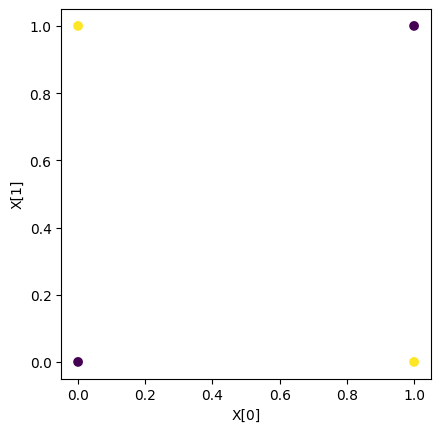

In [3]:
# Let's define a XOR dataset

# X will be matrix of N 2-dimensional inputs
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1],], dtype=torch.float64)
# Y is a matrix of N numners - answers
Y = torch.tensor([[0], [1], [1], [0],], dtype=torch.float64)

plt.scatter(
    X[:, 0], X[:, 1], c=Y[:, 0],
)
plt.xlabel("X[0]")
plt.ylabel("X[1]")
plt.axis("square")

## Problem 1

The code below contains a mock-up of a two-layer neural network. Fill in the code and manually set weights to solve the XOR problem.

Please note: the shapes are set to be compatible with PyTorch's conventions:
* a batch containing $N$ $D$-dimensional examples has shape $N\times D$ (each example is a row!)
* a weight matrix in a linear layer with $I$ inputs and $O$ outputs has shape $O \times I$
* a bias vector is a 1D vector. Please note that [broadcasting rules](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) allow us to think about it as a $1 \times D$ matrix.

In [28]:
def sigmoid(x):
    return 1 / (1 + pow(np.e, -x))


class SmallNet:
    def __init__(self, in_features: int, num_hidden: int, dtype=torch.float32):
        self.W1 = torch.zeros((num_hidden, in_features), dtype=dtype)
        self.b1 = torch.zeros((num_hidden,), dtype=dtype)
        self.W2 = torch.zeros((1, num_hidden), dtype=dtype)
        self.b2 = torch.zeros((1,), dtype=dtype)
        self.init_params()

    def init_params(self):
        # for Problem 2:
        # set all parameters to small random values, e.g. from N(0, 0.5)
        torch.nn.init.normal_(self.W1, mean=0, std=0.5)
        torch.nn.init.normal_(self.b1, mean=0, std=0.5)
        torch.nn.init.normal_(self.W2, mean=0, std=0.5)
        torch.nn.init.normal_(self.b2, mean=0, std=0.5)

    def forward(self, X, Y=None, do_backward=False):
        # Problem 1: Fill in details of forward propagation

        # Input to neurons in 1st layer
        A1 = X @ self.W1.t() + self.b1
        # Outputs after the sigmoid non-linearity
        O1 = sigmoid(A1)
        # Inputs to neuron in the second layer
        A2 = O1 @ self.W2.t() + self.b2
        # Outputs after the sigmoid non-linearity
        O2 = sigmoid(A2)

        # When Y is none, simply return the predictions. Else compute the loss
        if Y is not None:
            eps = 1e-8
            loss = -Y * torch.log(O2 + eps) - (1 - Y) * torch.log(1 - O2 + eps) # cross-entropy loss
            # normalize loss by batch size
            loss = loss.sum() / X.shape[0]
        else:
            loss = torch.nan

        if do_backward:
            # in Problem 2:
            # fill in the gradient computation
            # Please note, that there is a correspondance between
            # the forward and backward pass: with backward computations happening
            # in reverse order.
            # We save the gradients with respect to the parameters as fields of self.
            # It is not very elegant, but simplifies training code later on.

            # A2_grad is the gradient of loss with respect to A2
            # Hint: there is a concise formula for the gradient
            # of logistic sigmoid and cross-entropy loss
            
            A2_grad = (O2 - Y) / X.shape[0]
            self.b2_grad = A2_grad.sum(0)
            self.W2_grad = A2_grad.t() @ O1
            O1_grad = A2_grad @ self.W2
            A1_grad = O1_grad * O1 * (1 - O1)
            self.b1_grad = A1_grad.sum(0)
            self.W1_grad = A1_grad.t() @ X


        return O2, loss

In [29]:
# Problem 1:
# Set the weight values to solve the XOR problem

net_z1 = SmallNet(2, 2, dtype=torch.float64)
net_z1.W1 = torch.tensor([[1000,1000], [-1000,-1000]], dtype=torch.float64)
net_z1.b1 = torch.tensor([-1500, 500], dtype=torch.float64)
net_z1.W2 = torch.tensor([[-1000,-1000]], dtype=torch.float64)
net_z1.b2 = torch.tensor([100], dtype=torch.float64)

# Hint: since we use the logistic sigmoid activation, the weights may need to
# be fairly large


predictions, loss = net_z1.forward(X, Y, do_backward=True)
for x, p in zip(X, predictions):
    print(f"XORnet({x}) = {p[0]}")

XORnet(tensor([0., 0.], dtype=torch.float64)) = 0.0
XORnet(tensor([0., 1.], dtype=torch.float64)) = 1.0
XORnet(tensor([1., 0.], dtype=torch.float64)) = 1.0
XORnet(tensor([1., 1.], dtype=torch.float64)) = 0.0


## Problem 2

In [30]:
def check_grad(net, param_name, X, Y, eps=1e-5):
    """A gradient checking routine"""

    param = getattr(net, param_name)
    param_flat_accessor = param.reshape(-1)

    grad = torch.empty_like(param)
    grad_flat_accessor = grad.reshape(-1)

    net.forward(X, Y, do_backward=True)
    orig_grad = getattr(net, param_name + "_grad")
    assert param.shape == orig_grad.shape

    for i in range(param_flat_accessor.shape[0]):
        orig_val = param_flat_accessor[i].item()
        param_flat_accessor[i] = orig_val + eps
        _, loss_positive = net.forward(X, Y)
        param_flat_accessor[i] = orig_val - eps
        _, loss_negative = net.forward(X, Y)
        param_flat_accessor[i] = orig_val
        grad_flat_accessor[i] = (loss_positive - loss_negative) / (2 * eps)
    assert torch.allclose(grad, orig_grad)
    return grad, orig_grad

In [31]:
# Hint: use float64 for checking the correctness of the gradient
net_z2 = SmallNet(2, 2, dtype=torch.float64)

for param_name in ["W1", "b1", "W2", "b2"]:
    check_grad(net_z2, param_name, X, Y)

## Problem 3

In [32]:
net_z3 = SmallNet(2, 10, dtype=torch.float64)

alpha = 0.1  # set a learning rate

for i in range(100000):
    _, loss = net_z3.forward(X, Y, do_backward=True)
    if (i % 5000) == 0:
        print(f"after {i} steps \tloss={loss}")
    for param_name in ["W1", "b1", "W2", "b2"]:
        param = getattr(net_z3, param_name)
        # Hint: use the construct `param[:]` to change the contents of the array!
        # Doing instead `param = new_val` simply changes to what the variable
        # param points to, without affecting the network!
        # alternatively, you could do setattr(net_z3, param_name, new_value)
        param[:] = param - alpha * getattr(net_z3, param_name + "_grad")

after 0 steps 	loss=0.8501010203130174
after 5000 steps 	loss=0.03160344911529167
after 10000 steps 	loss=0.009508912173684967
after 15000 steps 	loss=0.005259145444068849
after 20000 steps 	loss=0.0035502972228858643
after 25000 steps 	loss=0.0026473300378055714
after 30000 steps 	loss=0.0020952274891631473
after 35000 steps 	loss=0.0017253547190966148
after 40000 steps 	loss=0.0014615222135205977
after 45000 steps 	loss=0.0012645156833080839
after 50000 steps 	loss=0.001112187667217231
after 55000 steps 	loss=0.0009911260820010892
after 60000 steps 	loss=0.0008927546482368545
after 65000 steps 	loss=0.0008113444784505154
after 70000 steps 	loss=0.000742929005486771
after 75000 steps 	loss=0.000684678274205257
after 80000 steps 	loss=0.000634521213136054
after 85000 steps 	loss=0.0005909086155529938
after 90000 steps 	loss=0.0005526594075141861
after 95000 steps 	loss=0.0005188580360206891


In [33]:
predictions, loss = net_z3.forward(X, Y, do_backward=True)
for x, p in zip(X, predictions):
    print(f"XORnet({x}) = {p[0]}")

XORnet(tensor([0., 0.], dtype=torch.float64)) = 0.0003523399645501016
XORnet(tensor([0., 1.], dtype=torch.float64)) = 0.9995219369920607
XORnet(tensor([1., 0.], dtype=torch.float64)) = 0.9994897000383449
XORnet(tensor([1., 1.], dtype=torch.float64)) = 0.0006139788365007438


In [4]:
# 3D XOR:
# Generate data for a 3D XOR task
# Then estimate the success rate of training the network with diferent
# hidden sizes.

X3 = torch.tensor([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1],
                   [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]], dtype=torch.float64)
Y3 = torch.tensor([[0], [1], [1], [0], [1], [0], [0], [1]], dtype=torch.float64)

DIMS = [2, 3, 5, 10, 20]
alpha = 0.1
results = []
train_histories = []
for hidden_dim in DIMS:
    # run a few trainings and record the fraction of successful ones
    successes = 0
    ITER = 3
    train_histories.append([])
    for _ in range(ITER):
        net_z3v2 = SmallNet(3, hidden_dim, dtype=torch.float64)
        for i in range(10000 + 1):
            _, loss = net_z3v2.forward(X3, Y3, do_backward=True)

            # if (i % 5000) == 0:
            #     print(f"after {i} steps \tloss={loss}")

            if (i % 5000) == 0:
                if len(train_histories[-1]) <= i//5000:
                    train_histories[-1].append(loss)
                else:
                    train_histories[-1][i//5000] += loss
                    train_histories[-1][i//5000] /= 2

            for param_name in ["W1", "b1", "W2", "b2"]:
                param = getattr(net_z3v2, param_name)
                param[:] = param - alpha * getattr(net_z3v2, param_name + "_grad")
        
        predictions, loss = net_z3v2.forward(X3, Y3, do_backward=True)
        success = torch.allclose(predictions.round(), Y3)
        print(loss, success)
        successes += success

    results.append(successes / ITER)
    print(f"hidden_dim={hidden_dim} success rate={results[-1]}")

plt.plot(DIMS, results)
plt.xlabel("Hidden layer size")
plt.ylabel("Success rate")
plt.show()

for i, history in enumerate(train_histories):
    plt.plot(history, label=f"hidden_dim={DIMS[i]}")
plt.xlabel("Training steps (x5000)")
plt.ylabel("Loss")
plt.legend()
plt.show()

NameError: name 'SmallNet' is not defined

## Problem 4


In [35]:
def sigmoid(x):
    return 1 / (1 + pow(np.e, -x))

def relu(x):
    return torch.maximum(x, torch.tensor(0.0))


class SmallNet_Z4:
    def __init__(self, in_features: int, num_hidden: int, lr=0.1, dtype=torch.float32):
        self.W1 = torch.zeros((num_hidden, in_features), dtype=dtype)
        self.b1 = torch.zeros((num_hidden,), dtype=dtype)
        self.W2 = torch.zeros((1, num_hidden), dtype=dtype)
        self.b2 = torch.zeros((1,), dtype=dtype)
        self.init_params(lr)

    def init_params(self, lr=0.1):
        torch.nn.init.normal_(self.W1, mean=0, std=0.5)
        torch.nn.init.normal_(self.b1, mean=0, std=0.5)
        torch.nn.init.normal_(self.W2, mean=0, std=0.5)
        torch.nn.init.normal_(self.b2, mean=0, std=0.5)
        self.lr = lr

    def forward(self, X, Y=None, do_backward=False):
        A1 = X @ self.W1.t() + self.b1
        O1 = relu(A1)
        A2 = O1 @ self.W2.t() + self.b2
        O2 = sigmoid(A2)

        if Y is not None:
            eps = 1e-8
            loss = -Y * torch.log(O2 + eps) - (1 - Y) * torch.log(1 - O2 + eps) # cross-entropy loss
            loss = loss.sum() / X.shape[0]
        else:
            loss = torch.nan

        if do_backward:
            A2_grad = (O2 - Y) / X.shape[0]
            self.b2_grad = A2_grad.sum(0)
            self.W2_grad = A2_grad.t() @ O1
            O1_grad = A2_grad @ self.W2
            # A1_grad = O1_grad * O1 * (1 - O1)
            A1_grad = O1_grad * (O1 > 0).float() # increase numerical stability
            self.b1_grad = A1_grad.sum(0)
            self.W1_grad = A1_grad.t() @ X

            self.W1 -= self.lr * self.W1_grad
            self.b1 -= self.lr * self.b1_grad
            self.W2 -= self.lr * self.W2_grad
            self.b2 -= self.lr * self.b2_grad


        return O2, loss

after 0 steps 	loss=0.7296332434598403
after 5000 steps 	loss=0.6755261579694989
after 10000 steps 	loss=0.6753140502281858
tensor(0.6756, dtype=torch.float64) False
after 0 steps 	loss=0.826025190138088
after 5000 steps 	loss=0.5414554641643732
after 10000 steps 	loss=0.5412459427285465
tensor(0.5412, dtype=torch.float64) False
after 0 steps 	loss=0.7048413709576355
after 5000 steps 	loss=0.5979543459747814
after 10000 steps 	loss=0.5977060471053697
tensor(0.5977, dtype=torch.float64) False
hidden_dim=2 success rate=0.0
after 0 steps 	loss=0.7019001313250071
after 5000 steps 	loss=0.5454184057640443
after 10000 steps 	loss=0.5427755384509281
tensor(0.5428, dtype=torch.float64) False
after 0 steps 	loss=0.7086507482929363
after 5000 steps 	loss=0.2849440492065318
after 10000 steps 	loss=0.28230250820059666
tensor(0.2823, dtype=torch.float64) False
after 0 steps 	loss=0.7168302966813042
after 5000 steps 	loss=0.5466232671900306
after 10000 steps 	loss=0.5430297173843027
tensor(0.5430, d

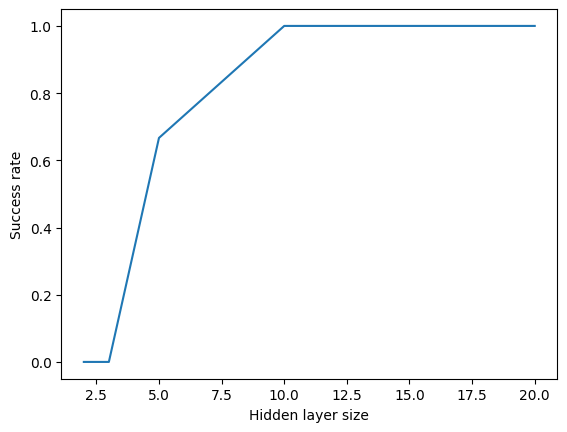

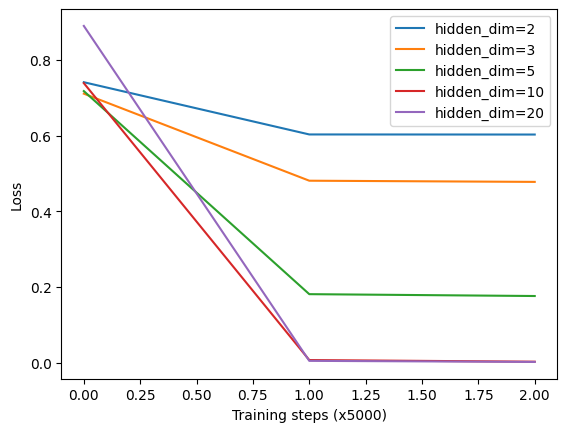

In [36]:
# 3D XOR:
# Generate data for a 3D XOR task
# Then estimate the success rate of training the network with diferent
# hidden sizes.

X3 = torch.tensor([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1],
                   [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]], dtype=torch.float64)
Y3 = torch.tensor([[0], [1], [1], [0], [1], [0], [0], [1]], dtype=torch.float64)

def relu(x):
    return torch.maximum(x, torch.zeros_like(x))

DIMS = [2, 3, 5, 10, 20]
results = []
train_histories = []
for hidden_dim in DIMS:
    # run a few trainings and record the fraction of successful ones
    successes = 0
    ITER = 3
    train_histories.append([])
    for _ in range(ITER):
        net_z4 = SmallNet_Z4(3, hidden_dim, dtype=torch.float64)
        for i in range(10000 + 1):
            _, loss = net_z4.forward(X3, Y3, do_backward=True)

            if (i % 5000) == 0:
                print(f"after {i} steps \tloss={loss}")

            if (i % 5000) == 0:
                if len(train_histories[-1]) <= i//5000:
                    train_histories[-1].append(loss)
                else:
                    train_histories[-1][i//5000] += loss
                    train_histories[-1][i//5000] /= 2

        predictions, loss = net_z4.forward(X3, Y3, do_backward=True)
        success = torch.allclose(predictions.round(), Y3)
        print(loss, success)
        successes += success

    results.append(successes / ITER)
    print(f"hidden_dim={hidden_dim} success rate={results[-1]}")

plt.plot(DIMS, results)
plt.xlabel("Hidden layer size")
plt.ylabel("Success rate")
plt.show()

for i, history in enumerate(train_histories):
    plt.plot(history, label=f"hidden_dim={DIMS[i]}")
plt.xlabel("Training steps (x5000)")
plt.ylabel("Loss")
plt.legend()

## Problem 5

In [5]:
def sigmoid(x):
    return 1 / (1 + pow(np.e, -x))

def relu(x):
    return torch.maximum(x, torch.tensor(0.0))


class SmallNet_Z5:
    def __init__(self, in_features: int, num_hidden, lr=0.1, dtype=torch.float32):
        self.W1 = torch.zeros((num_hidden[0], in_features), dtype=dtype)
        self.b1 = torch.zeros((num_hidden[0],), dtype=dtype)
        self.W2 = torch.zeros((num_hidden[1], num_hidden[0]), dtype=dtype)
        self.b2 = torch.zeros((num_hidden[1],), dtype=dtype)
        self.W3 = torch.zeros((1, num_hidden[1]), dtype=dtype)
        self.b3 = torch.zeros((1,), dtype=dtype)
        self.init_params(lr)

    def init_params(self, lr):
        torch.nn.init.normal_(self.W1, mean=0, std=0.5)
        torch.nn.init.normal_(self.b1, mean=0, std=0.5)
        torch.nn.init.normal_(self.W2, mean=0, std=0.5)
        torch.nn.init.normal_(self.b2, mean=0, std=0.5)
        torch.nn.init.normal_(self.W3, mean=0, std=0.5)
        torch.nn.init.normal_(self.b3, mean=0, std=0.5)
        self.lr = lr

    def forward(self, X, Y=None, do_backward=False):
        A1 = X @ self.W1.t() + self.b1
        O1 = sigmoid(A1)
        A2 = O1 @ self.W2.t() + self.b2
        O2 = sigmoid(A2)
        A3 = O2 @ self.W3.t() + self.b3
        O3 = sigmoid(A3)

        if Y is not None:
            eps = 1e-8
            loss = -Y * torch.log(O3 + eps) - (1 - Y) * torch.log(1 - O3 + eps) # cross-entropy loss
            loss = loss.sum() / X.shape[0]
        else:
            loss = torch.nan

        if do_backward:
            A3_grad = (O3 - Y) / X.shape[0]
            self.b3_grad = A3_grad.sum(0)
            self.W3_grad = A3_grad.t() @ O2
            O2_grad = A3_grad @ self.W3

            A2_grad = O2_grad * O2 * (1 - O2)
            self.b2_grad = A2_grad.sum(0)
            self.W2_grad = A2_grad.t() @ O1
            O1_grad = A2_grad @ self.W2

            A1_grad = O1_grad * O1 * (1 - O1)
            self.b1_grad = A1_grad.sum(0)
            self.W1_grad = A1_grad.t() @ X

            self.W1 -= self.lr * self.W1_grad
            self.b1 -= self.lr * self.b1_grad
            self.W2 -= self.lr * self.W2_grad
            self.b2 -= self.lr * self.b2_grad
            self.W3 -= self.lr * self.W3_grad
            self.b3 -= self.lr * self.b3_grad


        return O3, loss

In [6]:
net_z5 = SmallNet_Z5(3, [10, 10], dtype=torch.float64)

X3 = torch.tensor([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1],
                   [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]], dtype=torch.float64)
Y3 = torch.tensor([[0], [1], [1], [0], [1], [0], [0], [1]], dtype=torch.float64)

for i in range(20000 + 1):
    _, loss = net_z5.forward(X3, Y3, do_backward=True)
    if (i % 5000) == 0:
        print(f"after {i} steps \tloss={loss}")

predictions, loss = net_z5.forward(X3, Y3, do_backward=True)
for x, p in zip(X3, predictions):
    print(f"XORnet({x}) = {p[0]}")

after 0 steps 	loss=0.8828069908369254
after 5000 steps 	loss=0.6930096769513775
after 10000 steps 	loss=0.6924885319413217
after 15000 steps 	loss=0.6771243573612877
after 20000 steps 	loss=0.011147759547340017
XORnet(tensor([0., 0., 0.], dtype=torch.float64)) = 0.007236721612619377
XORnet(tensor([0., 0., 1.], dtype=torch.float64)) = 0.990616586312304
XORnet(tensor([0., 1., 0.], dtype=torch.float64)) = 0.9824913555380977
XORnet(tensor([0., 1., 1.], dtype=torch.float64)) = 0.00830565767642783
XORnet(tensor([1., 0., 0.], dtype=torch.float64)) = 0.9875085565355398
XORnet(tensor([1., 0., 1.], dtype=torch.float64)) = 0.018777422409484757
XORnet(tensor([1., 1., 0.], dtype=torch.float64)) = 0.0087018722516541
XORnet(tensor([1., 1., 1.], dtype=torch.float64)) = 0.9938392762705448


## Problem 6

In [7]:
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

def relu(x):
    return torch.maximum(x, torch.tensor(0.0))

class SmallNet_Z6:
    def __init__(self, in_features: int, num_layers: int, num_hidden: int, lr=0.1, dtype=torch.float32):
        self.W = [torch.zeros((num_hidden, in_features), dtype=dtype)]
        self.b = [torch.zeros((num_hidden,), dtype=dtype)]
        
        for _ in range(1, num_layers):
            self.W.append(torch.zeros((num_hidden, num_hidden), dtype=dtype))
            self.b.append(torch.zeros((num_hidden,), dtype=dtype))
        
        self.W.append(torch.zeros((1, num_hidden), dtype=dtype))
        self.b.append(torch.zeros((1,), dtype=dtype))

        self.init_params(lr)

    def init_params(self, lr):
        for i in range(len(self.W)):
            torch.nn.init.normal_(self.W[i], mean=0, std=0.5)
            torch.nn.init.normal_(self.b[i], mean=0, std=0.5)
        self.lr = lr

    def forward(self, X, Y=None, do_backward=False):
        A = [X @ self.W[0].t() + self.b[0]]
        O = [sigmoid(A[0])]
        
        for i in range(1, len(self.W)):
            A.append(O[-1] @ self.W[i].t() + self.b[i])
            O.append(sigmoid(A[-1]))
        

        if Y is not None:
            eps = 1e-8
            loss = -Y * torch.log(O[-1] + eps) - (1 - Y) * torch.log(1 - O[-1] + eps)
            loss = loss.sum() / X.shape[0]
        else:
            loss = torch.nan
        
        
        if do_backward:
            # A3_grad = (O3 - Y) / X.shape[0]

            # self.b3_grad = A3_grad.sum(0)
            # self.W3_grad = A3_grad.t() @ O2
            # O2_grad = A3_grad @ self.W3
            # A2_grad = O2_grad * O2 * (1 - O2)

            # self.b2_grad = A2_grad.sum(0)
            # self.W2_grad = A2_grad.t() @ O1
            # O1_grad = A2_grad @ self.W2

            # A1_grad = O1_grad * O1 * (1 - O1)
            # self.b1_grad = A1_grad.sum(0)
            # self.W1_grad = A1_grad.t() @ X

            A_grad = (O[-1] - Y) / X.shape[0]
            self.b_grad = []
            self.W_grad = []
            
            for i in range(len(self.W) - 1, 0, -1):
                self.b_grad.append(A_grad.sum(0))
                self.W_grad.append(A_grad.t() @ O[i - 1])
                A_grad = (A_grad @ self.W[i]) * O[i - 1] * (1 - O[i - 1])
                # A_grad = (A_grad @ self.W[i]) * (O[i - 1] > 0).float()

            self.b_grad.append(A_grad.sum(0))
            self.W_grad.append(A_grad.t() @ X)

            self.W_grad.reverse()
            self.b_grad.reverse()

            for i in range(len(self.W)):
                self.W[i] -= self.lr * self.W_grad[i]
                self.b[i] -= self.lr * self.b_grad[i]

        return O[-1], loss

In [9]:
net_z6 = SmallNet_Z6(3, 1, 5, 0.01, dtype=torch.float64)

X3 = torch.tensor([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1],
                   [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]], dtype=torch.float64)
Y3 = torch.tensor([[0], [1], [1], [0], [1], [0], [0], [1]], dtype=torch.float64)

for i in range(20000 + 1):
    _, loss = net_z6.forward(X3, Y3, do_backward=True)

    if (i % 5000) == 0:
        print(f"after {i} steps \tloss={loss}")

for x, p in zip(X3, predictions):
    print(f"XORnet({x}) = {p[0]}")

after 0 steps 	loss=0.7245333645800758
after 5000 steps 	loss=0.692933220396775
after 10000 steps 	loss=0.6927840509256904
after 15000 steps 	loss=0.6925860927891603
after 20000 steps 	loss=0.6922962188902443
XORnet(tensor([0., 0., 0.], dtype=torch.float64)) = 0.007236721612619377
XORnet(tensor([0., 0., 1.], dtype=torch.float64)) = 0.990616586312304
XORnet(tensor([0., 1., 0.], dtype=torch.float64)) = 0.9824913555380977
XORnet(tensor([0., 1., 1.], dtype=torch.float64)) = 0.00830565767642783
XORnet(tensor([1., 0., 0.], dtype=torch.float64)) = 0.9875085565355398
XORnet(tensor([1., 0., 1.], dtype=torch.float64)) = 0.018777422409484757
XORnet(tensor([1., 1., 0.], dtype=torch.float64)) = 0.0087018722516541
XORnet(tensor([1., 1., 1.], dtype=torch.float64)) = 0.9938392762705448


## Problem 7

Consider the following function $\boldsymbol f: \mathbb R^n \to \mathbb R^k$:
$$ \hat{\boldsymbol y} := \boldsymbol f(\boldsymbol x\,;\,\,W, \boldsymbol b) = \mathrm{softmax}(\boldsymbol z) \qquad (\boldsymbol x \in \mathbb R^{n}, \, W \in\mathbb R^{k\times n}, \, \boldsymbol b \in \mathbb R^k), $$
where $$ \boldsymbol z = W  \boldsymbol x + \boldsymbol b $$
and $W, \boldsymbol b$ are the parameters.

$$ \hat{\boldsymbol y}_i = \frac{\exp(\boldsymbol z_i)}{\sum_{j=1}^k \exp(z_j)} = \frac{\exp(\boldsymbol z_i)}{\boldsymbol S} \qquad \boldsymbol z = (z_1, \ldots, z_k) $$

Analytically derive the form of the following gradients:



$$ \frac{\partial \hat{\boldsymbol y}}{\boldsymbol z} = \ldots $$

$$ \frac{\partial \hat{\boldsymbol y}_i}{\partial z_j} = 
\frac{S (\exp(z_i))' - \exp(z_i) \exp(z_j)}{S^2} =

\begin{cases}
\frac{S \exp(z_i) - \exp(2 z_i)}{(S)^2}
= \frac{\exp(z_i)}{S} (\frac{S - \exp(z_i)}{S})
= \hat{\boldsymbol y}_i (1 - \hat{\boldsymbol y}_i) & \text{if } i = j \\

\frac{0 - \exp(z_i) \exp(z_j)}{S^2} = - \frac{\exp(z_i)}{S} \frac{\exp(z_j)}{S} =
-\hat{\boldsymbol y}_i \hat{\boldsymbol y}_j & \text{if } i \neq j
\end{cases} 
$$


$$ \frac{\partial \hat{\boldsymbol y}}{W_{ij}} = \ldots $$

$$ \frac{\partial \hat{\boldsymbol y}_a}{W_{ij}} = \sum_{b=1}^k \frac{\partial \hat{\boldsymbol y}_a}{\partial z_b} \frac{\partial z_b}{\partial W_{ij}} $$

$$ 
\frac{\partial z_b}{\partial W_{ij}} = 
\begin{cases}
x_j & \text{if } b = i \\
0 & \text{if } b \neq i
\end{cases} 
= I(i = b) x_j 
$$

$$
\frac{\partial \hat{\boldsymbol y}_a}{\partial z_b} =
\begin{cases}
\hat{\boldsymbol y}_a (1 - \hat{\boldsymbol y}_a) & \text{if } a = b \\
-\hat{\boldsymbol y}_a \hat{\boldsymbol y}_b & \text{if } a \neq b
\end{cases}
$$

$$
\frac{\partial \hat{\boldsymbol y}_a}{W_{ij}} = \sum_{b=1}^k \frac{\partial \hat{\boldsymbol y}_a}{\partial z_b} I(i = b) x_j = \frac{\partial \hat{\boldsymbol y}_a}{\partial z_i} x_j =
\begin{cases}
\hat{\boldsymbol y}_a (1 - \hat{\boldsymbol y}_a) x_j & \text{if } a = i \\
-\hat{\boldsymbol y}_a \hat{\boldsymbol y}_i x_j & \text{if } a \neq i
\end{cases}
$$

$$ \frac{\partial \hat{\boldsymbol y}_a}{W_{ij}} = \hat{\boldsymbol y}_a (I(a = i) - \hat{\boldsymbol y}_i) x_j $$


$$ \frac{\partial \hat{\boldsymbol y}}{\boldsymbol b} = \ldots $$

$$ \frac{\partial \boldsymbol z_i}{\partial b_j} = I(i = j) $$
$$ \frac{\partial \hat{\boldsymbol y}_a}{\partial b_j} = \sum_{b=1}^k \hat{\boldsymbol y}_a (I(a = b) - \hat{\boldsymbol y}_b) I(b = j) = \hat{\boldsymbol y}_a (I(a = j) - \hat{\boldsymbol y}_j) $$